In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [31]:
df = pd.read_csv("../Section 33 - Thompson Sampling/Ads_CTR_Optimisation.csv")
'''Dataset for the simulation : click on Ads
    rows represent different unique users (10,000 users)
    cols represent ads type (10 unique ads)
- select the ads with the most clicks'''
df.shape, df.head()

((10000, 10),    Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
 0     1     0     0     0     1     0     0     0     1      0
 1     0     0     0     0     0     0     0     0     1      0
 2     0     0     0     0     0     0     0     0     0      0
 3     0     1     0     0     0     0     0     1     0      0
 4     0     0     0     0     0     0     0     0     0      0)

In [32]:
num_of_rows = df.shape[0]
num_of_cols = df.shape[1]

In [33]:
#implement Thompson Sampling
ads_selected = []
numbers_of_rewards_1 = np.zeros(num_of_cols, dtype=int)
numbers_of_rewards_0 = np.zeros(num_of_cols, dtype=int)
total_rewards = 0
numbers_of_rewards_1, numbers_of_rewards_0, total_rewards

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 0)

In [34]:
for n in range(0, num_of_rows) :
    ad = 0
    max_random = 0
    for i in range(0, num_of_cols) :
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,\
                                         numbers_of_rewards_0[i] + 1)
        if random_beta > max_random :
            max_random = random_beta
            #specific ad
            ad = i
    ads_selected.append(ad)  
    
    reward = df.values[n, ad]
    if reward == 1 :
        numbers_of_rewards_1[ad] += 1
    else :
        numbers_of_rewards_0[ad] += 1
        
    total_rewards += reward

In [35]:
total_rewards, numbers_of_rewards_1, numbers_of_rewards_0

(2568,
 array([  31,   24,    1,   14, 2432,    0,    9,   54,    2,    1]),
 array([ 135,  115,   30,   89, 6685,   24,   68,  219,   35,   32]))

In [36]:
ads_selected[:10], ads_selected[-10:]

([2, 0, 1, 3, 6, 8, 9, 7, 0, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

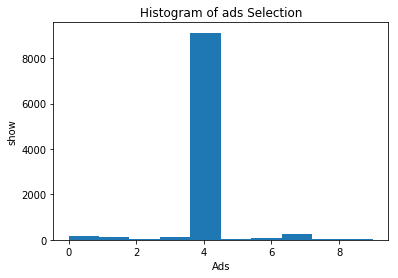

In [37]:
plt.hist(ads_selected)
plt.title('Histogram of ads Selection')
plt.xlabel('Ads')
plt.ylabel('show')
plt.show()